In [11]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math
import helpers
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
players = pd.read_csv(r'player_data_selected.csv')
players

C:\Users\shubhanshu gupta\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (62,63,73,74,75) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Year,Name,Age,Rating,Potential,Team,ID,Height,Weight,...,PHY,TotalPositions,Position 1,Position 2,Position 3,Position 4,Contract Start Date,Contract End Date,Contract Remaining,Category
0,0,2008,Ronaldinho,27,91,93,FC Barcelona,28130,180.3,179,...,75,1,CAM,NaN,NaN,NaN,2010,2010.0,2,Midfielder
1,1,2008,Kaká,25,90,91,Milan,138449,182.9,161,...,68,1,CAM,NaN,NaN,NaN,2009,2009.0,1,Midfielder
2,2,2008,Diego,22,88,90,SV Werder Bremen,136138,172.7,161,...,67,1,CAM,NaN,NaN,NaN,2010,2010.0,2,Midfielder
3,3,2008,S. Nasri,20,85,90,Olympique de Marseille,165239,177.8,165,...,70,1,CAM,NaN,NaN,NaN,2009,2009.0,1,Midfielder
4,4,2008,Deco,29,85,90,FC Barcelona,53769,177.8,161,...,75,1,CAM,NaN,NaN,NaN,2010,2010.0,2,Midfielder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233658,233658,2020,L. Klassen,19,58,75,TSV 1860 München,244181,172.7,152,...,57,2,LB,LM,NaN,NaN,2018,2020.0,0,Defender
233659,233659,2020,J. King,18,58,75,Sydney FC,246005,177.8,150,...,61,1,LB,NaN,NaN,NaN,2018,2020.0,0,Defender
233660,233660,2020,L. Obexer,22,57,68,FC Lugano,233502,177.8,159,...,60,2,LWB,LB,NaN,NaN,"Jun 30, 2020 On Loan",2020.0,0,Defender
233661,233661,2020,R. Donelon,23,57,62,Sligo Rovers,223091,170.2,157,...,60,3,LB,LWB,LM,NaN,2013,2020.0,0,Defender


In [3]:
players.drop('Unnamed: 0',axis=1,inplace=True)

#### We have divided the 13 positions on the football field into four categories namely defender,midfielder,goalkeeper and forward

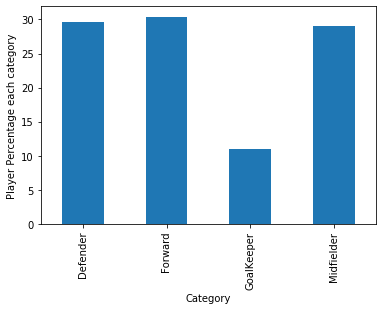

In [4]:
# Percentage of Distinct Players in each of the 4 categories
temp = players.drop_duplicates('Name')
#len(temp)
perc = temp.groupby('Category').size()/len(temp) * 100
#perc
perc.plot.bar()
plt.ylabel('Player Percentage each category')
plt.show()

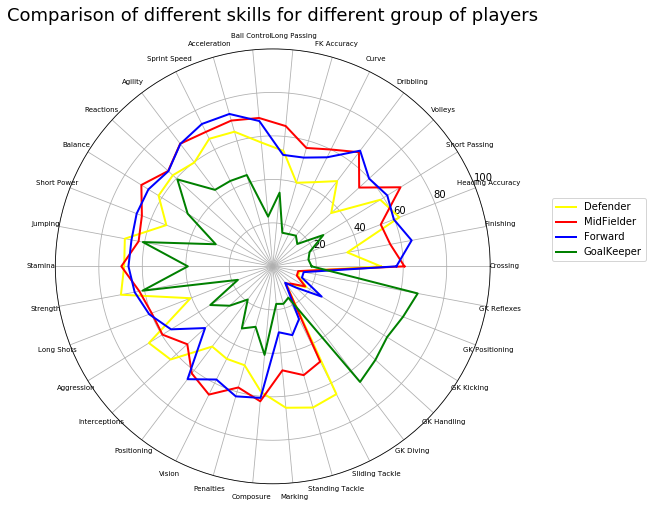

In [5]:
# Radar chart to compare all the major skills for players

skills = players.drop(['Year','Name','Age','Rating','Potential','Team','ID','Foot','Best Overall','Best Position',
                           'Growth','Value','Wage','Release Clause','Total Attacking','Total Skill','Total Power','Total Mentality'
                        ,'Total Defending','Total GK','Total Stats','Base Stats','Position 2','Position 3','Position 4',
                       'Contract Start Date','Contract End Date','Weak Foot','Skill Moves','Attacking Work Rate',
                          'Defensive Work Rate','International Reputation','TotalPositions','Position 1','Contract Remaining','Height'
                       ,'Weight','PHY','DEF','DRI','PAS','SHO','PAC','Total Movement'],axis=1)
player = skills.groupby("Category")[skills.columns.values].mean().reset_index()

plt.figure(figsize=(8,8))
ax = plt.subplot(projection="polar")
colList = list(player)[1:]
N  = len(colList)
values = player[player['Category'] == 'Defender'].drop("Category",axis = 1).values.flatten().tolist()
values += values[:1]
angles = [n / float(N)*2* math.pi for n in range(N)]
angles += angles[:1]

plt.xticks(angles[:-1],colList,color="black",size=7)
plt.ylim([0,100])
plt.plot(angles,values,color='yellow',linewidth=2,linestyle="solid")

values = player[player['Category'] == 'Midfielder'].drop("Category",axis = 1).values.flatten().tolist()
values += values[:1]
angles = [n / float(N)*2* math.pi for n in range(N)]
angles += angles[:1]

plt.xticks(angles[:-1],colList,color="black",size=7)
plt.ylim([0,100])
plt.plot(angles,values,color='red',linewidth=2,linestyle="solid")

values = player[player['Category'] == 'Forward'].drop("Category",axis = 1).values.flatten().tolist()
values += values[:1]
angles = [n / float(N)*2* math.pi for n in range(N)]
angles += angles[:1]

plt.xticks(angles[:-1],colList,color="black",size=7)
plt.ylim([0,100])
plt.plot(angles,values,color='blue',linewidth=2,linestyle="solid")

values = player[player['Category'] == 'GoalKeeper'].drop("Category",axis = 1).values.flatten().tolist()
values += values[:1]
angles = [n / float(N)*2* math.pi for n in range(N)]
angles += angles[:1]

plt.xticks(angles[:-1],colList,color="black",size=7)
plt.ylim([0,100])
plt.plot(angles,values,color='green',linewidth=2,linestyle="solid")

plt.gca().legend(('Defender', 'MidFielder','Forward','GoalKeeper'), bbox_to_anchor=(1, 0.5, 0.5, 0.5), loc=8)
plt.title("Comparison of different skills for different group of players",color="black", fontsize=18)
plt.subplots_adjust(wspace=.4,hspace=.4)

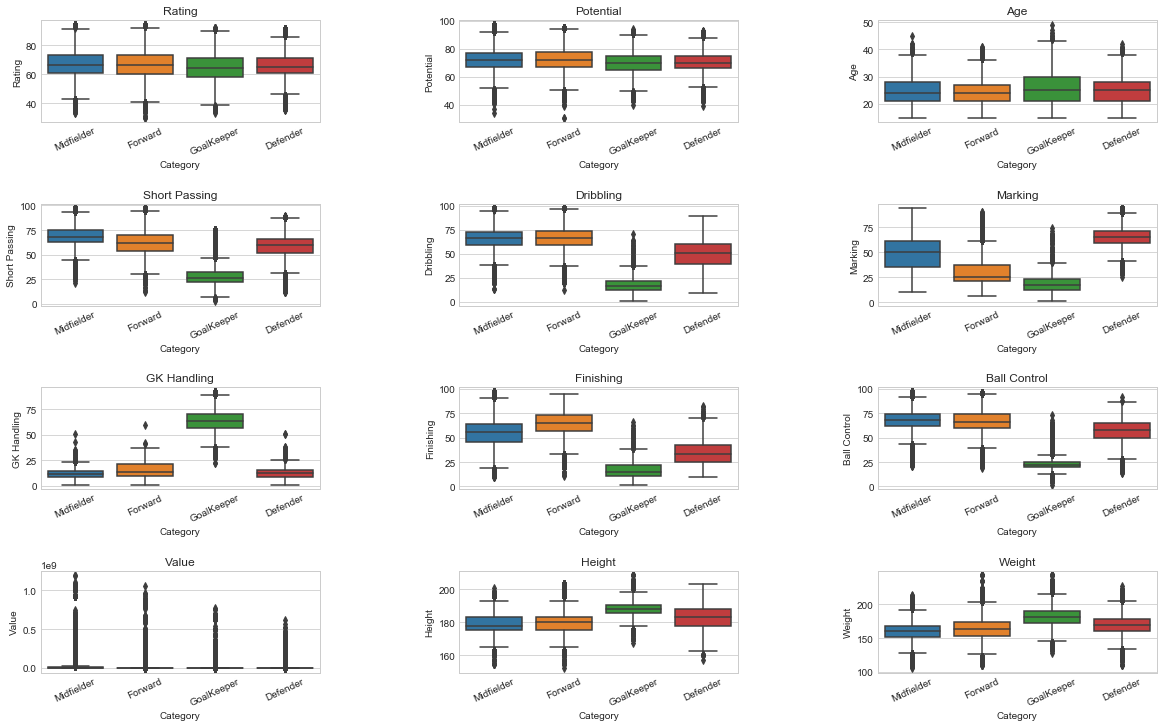

In [6]:
features = ['Rating','Potential','Age','Short Passing','Dribbling','Marking','GK Handling','Finishing','Ball Control','Value','Height','Weight']
helpers.generateBoxplots(players,features)

### Applying PCA

In [8]:
corr = players.corr(method ='pearson')
corr_matrix = corr.abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
related = [column for column in upper.columns if any(upper[column] > 0.8)]
related

['Potential',
 'Best Overall',
 'Crossing',
 'Finishing',
 'Short Passing',
 'Volleys',
 'Total Skill',
 'Dribbling',
 'Curve',
 'FK Accuracy',
 'Long Passing',
 'Ball Control',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Total Power',
 'Short Power',
 'Long Shots',
 'Total Mentality',
 'Positioning',
 'Vision',
 'Penalties',
 'Marking',
 'Standing Tackle',
 'Sliding Tackle',
 'GK Diving',
 'GK Handling',
 'GK Positioning',
 'GK Reflexes',
 'Total Stats',
 'Base Stats',
 'Skill Moves',
 'PAS',
 'DRI',
 'DEF',
 'PHY']

In [9]:
removeColumns = ['Volleys','Curve','Agility','Balance','Jumping','Vision','Composure','Sliding Tackle','ID','Contract End Date']
corr.drop(removeColumns,axis=1,inplace=True)
features = corr.columns.values

In [12]:
## Applying PCA for dimensionality Reduction and Visualizing different player groups
x = players.loc[:, features].values
y = players.loc[:,['Category']].values
x = StandardScaler().fit_transform(x)
pd.DataFrame(data = x, columns = features).head()

,Year,Age,Rating,Potential,Height,Weight,Best Overall,Growth,Value,Wage,...,Skill Moves,International Reputation,PAC,SHO,PAS,DRI,DEF,PHY,TotalPositions,Contract Remaining
0,-1.604195,0.491991,2.521279,2.489580,-0.143527,0.812105,2.552724,-0.669331,-0.249319,-0.367687,...,-1.152774,3.832091,1.964577,2.218535,2.313837,2.639728,-0.567730,0.926051,-0.720652,0.368166
1,-1.604195,0.057215,2.417401,2.251347,0.249913,-0.365229,2.445637,-0.867876,-0.249319,-0.367687,...,-1.152774,2.740881,2.057234,2.218535,2.476862,2.237755,-0.507747,0.249393,-0.720652,-0.330403
2,-1.604195,-0.594948,2.209645,2.132231,-1.293582,-0.365229,2.231462,-0.669331,-0.249319,-0.367687,...,-1.152774,1.649670,1.408637,1.757717,2.313837,2.157360,-0.327799,0.152727,-0.720652,0.368166
3,-1.604195,-1.029723,1.898012,2.132231,-0.521834,-0.103599,1.910200,-0.073696,-0.249319,-0.367687,...,-1.152774,1.649670,1.130667,1.428562,2.069300,1.916177,0.212048,0.442723,-0.720652,-0.330403
4,-1.604195,0.926766,1.898012,2.132231,-0.521834,-0.365229,1.910200,-0.073696,-0.249319,-0.367687,...,-1.152774,2.740881,1.315980,1.494393,2.313837,1.835782,-0.627713,0.926051,-0.720652,0.368166


### Two Component PCA

In [13]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC 1', 'PC 2'])
finalDf = pd.concat([principalDf, players[['Category']]], axis = 1)
pca.explained_variance_ratio_

array([0.39345867, 0.1439697 ])

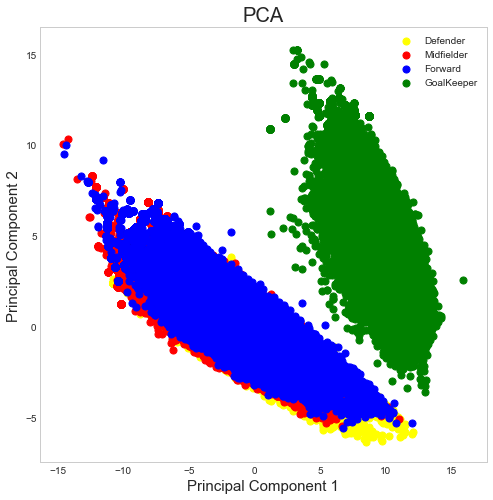

In [14]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA', fontsize = 20)


categories = ['Defender', 'Midfielder', 'Forward','GoalKeeper']
colors = ['yellow', 'red', 'blue','green']
for category, color in zip(categories,colors):
    indicesToKeep = finalDf['Category'] == category
    ax.scatter(finalDf.loc[indicesToKeep, 'PC 1']
               , finalDf.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)
ax.legend(categories)
ax.grid()

### Three Component PCA

In [16]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC 1', 'PC 2','PC 3'])
finalDf = pd.concat([principalDf, players[['Category']]], axis = 1)
pca.explained_variance_ratio_

array([0.39345867, 0.1439697 , 0.11185739])

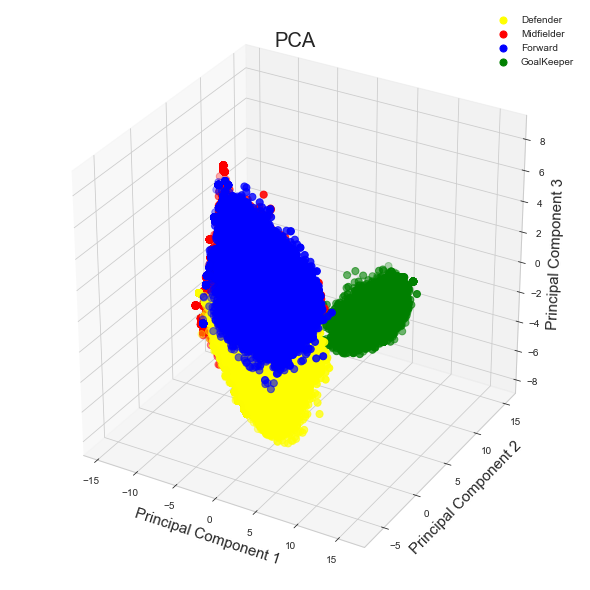

In [17]:
import mpl_toolkits.mplot3d.axes3d as p3
fig = plt.figure(figsize = (8,8))
ax = p3.Axes3D(fig)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('PCA', fontsize = 20)


categories = ['Defender', 'Midfielder', 'Forward','GoalKeeper']
colors = ['yellow', 'red', 'blue','green']
for category, color in zip(categories,colors):
    indicesToKeep = finalDf['Category'] == category
    ax.scatter(finalDf.loc[indicesToKeep, 'PC 1']
               , finalDf.loc[indicesToKeep, 'PC 2']
               , finalDf.loc[indicesToKeep, 'PC 3']
               , c = color
               , s = 50)
ax.legend(categories)
ax.grid()